# Finley's testing notebook

Data has been sourced from [MarineCadastre.gov AIS](https://marinecadastre.gov/ais/).

In [72]:
# Assign path to the CSV being worked with

CSV_PATH = '../AIS_2021_01_01.csv'

In [73]:
# Import necessary modules

import pandas as pd
import numpy as np

In [74]:
# Read data from CSV

data = pd.read_csv(CSV_PATH, low_memory=False)
data1 = data.copy()

data1.head(10)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,338325166,2021-01-01T00:00:20,28.08771,-82.77474,0.0,0.0,511.0,SALT WIFE,IMO0000000,NaN,37.0,NaN,13.0,6.0,NaN,NaN,B
1,368163740,2021-01-01T00:00:18,26.10727,-80.12551,0.0,360.0,511.0,TOTALLY EXCELLENT,IMO0000000,WDL7818,37.0,NaN,18.0,4.0,NaN,NaN,B
2,366811570,2021-01-01T00:00:23,30.66150,-88.03264,0.0,196.0,270.0,NATALIE H,IMO7200245,WDA4637,31.0,0.0,18.0,7.0,NaN,NaN,A
3,368140750,2021-01-01T00:00:24,30.23140,-93.25791,0.0,50.5,272.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A
4,368170010,2021-01-01T00:00:28,29.57223,-90.59391,0.0,316.2,197.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,A
5,538007847,2021-01-01T00:00:39,30.71185,-88.04063,0.0,11.2,169.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A
6,338224348,2021-01-01T00:00:19,32.83470,-79.92896,0.1,342.2,511.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A
7,368134490,2021-01-01T00:00:17,29.56063,-92.61208,0.2,47.5,511.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,A
8,333234990,2021-01-01T00:00:17,27.45076,-80.32039,0.0,264.9,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
9,368120090,2021-01-01T00:00:16,29.95115,-90.01498,0.1,233.4,511.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A


| | Name | Description | Example | Units | Resolution | Type | Size |
| - | - | - | - | - | - | - | - |
| 1 | MMSI | Maritime Mobile Service Identity Value | 477220100 | | | Text | 8 |
| 2 | BaseDateTime | Full UTC date and time | 2017-02-01T20:05:07 | | YYYY-MM-DD:HH-MM-SS | DateTime | |
| 3 | LAT | Latitude | 42.35137 | decimal degrees | XX.XXXXX | Double | 8 | 
| 4 | LON | Longitude | -71.04182 | decimal degrees | XXX.XXXXX | Double | 8 |
| 5 | SOG | Speed Over Ground | 5.9 | knots | XXX.X | Float | 4 |
| 6 | COG | Course Over Ground | 47.5 | degrees | XXX.X | Float | 4 |
| 7 | Heading | True heading angle | 45.1 | degrees | XXX.X | Float | 4 |
| 8 | VesselName | Name as shown on the station radio license | OOCL Malaysia | | | Text | 32 |
| 9 | IMO | International Maritime Organization Vessel number | IMO9627980 | | | Text | 16 |
| 10 | CallSign | Call sign as assigned by FCC | VRME7 | | | Text | 8 |
| 11 | VesselType | [Vessel type as defined in NAIS specifications](https://coast.noaa.gov/data/marinecadastre/ais/VesselTypeCodes2018.pdf) | 70 | | | Integer | short |
| 12 | Status | Navigation status as defined by the COLREGS | 3 | | | Integer | short |
| 13 | Length | Length of vessel (see NAIS specifications) | 71.0 | meters | XXX.X | Float | 4 |
| 14 | Width | Width of vessel (see NAIS specifications) | 12.0 | meters | XXX.X | Float | 4 |
| 15 | Draft | Draft depth of vessel (see NAIS specifications) | 3.5 | meters | XXX.X | Float | 4 |
| 16 | Cargo | Cargo type (see NAIS specification and codes) | 70 | | | Text | 4 |
| 17 | TransceiverClass | Class of AIS transceiver | A | | | Text | 2 |

[View original source](https://coast.noaa.gov/data/marinecadastre/ais/data-dictionary.pdf) 

In [75]:
# Convert data types of columns to what they are supposed to be

pd.to_datetime(data1['BaseDateTime'], errors='coerce')
data1[['LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 'Status', 'Length', 'Width', 'Draft']].apply(pd.to_numeric, errors='coerce')

data1.dtypes

MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType          float64
Status              float64
Length              float64
Width               float64
Draft               float64
Cargo               float64
TranscieverClass     object
dtype: object

In [76]:
# Drop unnecessary columns

data1.drop(['VesselName', 'IMO', 'CallSign'], inplace=True, axis=1) # Drop extra unique identifiers to only use MMSI

These identifiers may actually be applicable for data validation. They could be used to ensure that the MMSI is in fact unique to the vessel and that it isn't switched around leading to unexpected behaviours.

In [77]:
# Create a subset of the data to play with

print(f'Full data entries: {data.shape[0]}')

data2 = data1.head(100_000)

print('Entries:', data2.shape[0])
print('Columns:', data2.shape[1], data2.columns.to_list())

data2.head(10)

Full data entries: 6624812
Entries: 100000
Columns: 14 ['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 'Status', 'Length', 'Width', 'Draft', 'Cargo', 'TranscieverClass']


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,338325166,2021-01-01T00:00:20,28.08771,-82.77474,0.0,0.0,511.0,37.0,NaN,13.0,6.0,NaN,NaN,B
1,368163740,2021-01-01T00:00:18,26.10727,-80.12551,0.0,360.0,511.0,37.0,NaN,18.0,4.0,NaN,NaN,B
2,366811570,2021-01-01T00:00:23,30.66150,-88.03264,0.0,196.0,270.0,31.0,0.0,18.0,7.0,NaN,NaN,A
3,368140750,2021-01-01T00:00:24,30.23140,-93.25791,0.0,50.5,272.0,NaN,15.0,NaN,NaN,NaN,NaN,A
4,368170010,2021-01-01T00:00:28,29.57223,-90.59391,0.0,316.2,197.0,NaN,13.0,NaN,NaN,NaN,NaN,A
5,538007847,2021-01-01T00:00:39,30.71185,-88.04063,0.0,11.2,169.0,NaN,5.0,NaN,NaN,NaN,NaN,A
6,338224348,2021-01-01T00:00:19,32.83470,-79.92896,0.1,342.2,511.0,NaN,15.0,NaN,NaN,NaN,NaN,A
7,368134490,2021-01-01T00:00:17,29.56063,-92.61208,0.2,47.5,511.0,NaN,4.0,NaN,NaN,NaN,NaN,A
8,333234990,2021-01-01T00:00:17,27.45076,-80.32039,0.0,264.9,511.0,NaN,0.0,NaN,NaN,NaN,NaN,A
9,368120090,2021-01-01T00:00:16,29.95115,-90.01498,0.1,233.4,511.0,NaN,15.0,NaN,NaN,NaN,NaN,A


Latitude and longitude may shift slightly, whether it be from vessel movement on its mooring or due to GPS inaccuracy. As explained [here](https://gis.stackexchange.com/a/8674), the fourth decimal place represents a change of 11 metres. Given the purpose of our project, we likely don't need anything more accurate than that. The provided data seems to offer up to 5 increments (at least in the 10 provided entries in the above table) but that last decimal is only 1.1 metres, and stationary vessels will appear to be moving slightly even when they aren't being sailed. As an example:

In [78]:
# Preview slight movement of stationary vessels

data2[data2['MMSI'] == 366811570].head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
2,366811570,2021-01-01T00:00:23,30.66150,-88.03264,0.0,196.0,270.0,31.0,0.0,18.0,7.0,NaN,NaN,A
6711,366811570,2021-01-01T00:01:53,30.66149,-88.03263,0.0,196.0,271.0,31.0,0.0,18.0,7.0,NaN,NaN,A
14983,366811570,2021-01-01T00:17:13,30.66150,-88.03264,0.0,0.8,266.0,31.0,0.0,18.0,7.0,NaN,NaN,A
22883,366811570,2021-01-01T00:18:22,30.66151,-88.03264,0.0,0.8,266.0,31.0,0.0,18.0,7.0,NaN,NaN,A
25056,366811570,2021-01-01T00:19:32,30.66150,-88.03263,0.0,0.8,266.0,31.0,0.0,18.0,7.0,NaN,NaN,A


For the sake of simplicity I will be pretending that the latitude and longitude apply to a 2D plane rather than a globe. The results will not be completely accurate because of this, but it gives an approximation that is close *enough* for the data exploration.

In [79]:
# Remove stationary vessels from the dataset

import math

distance_km = 0.1

data3 = data2.copy() # Copies the dataset to filter and graph
unique_mmsi = data3['MMSI'].unique()

print(f'Filtering vessels to travel at least {distance_km}km...')
print(f'Entries before filtering: {data3.shape[0]}')

for mmsi in unique_mmsi:
  unique_data = data3[data3['MMSI'] == mmsi].sort_values(by='BaseDateTime', ignore_index=True)

  lon = list(unique_data.LON)
  lat = list(unique_data.LAT)

  distance_travelled = 0
  for i in range(1, len(unique_data.values)):
    distance_travelled += math.sqrt(math.pow(lon[i] - lon[i-1], 2) + math.pow(lat[i] - lat[i-1], 2))

  if (distance_travelled < distance_km):
    data3 = data3[data3['MMSI'] != mmsi]

print(f'Entries after filtering: {data3.shape[0]}')

Filtering vessels to travel at least 0.1km...
Entries before filtering: 100000
Entries after filtering: 5346


There are 283 unique MMSI in the subset that travel greater than 0.1km


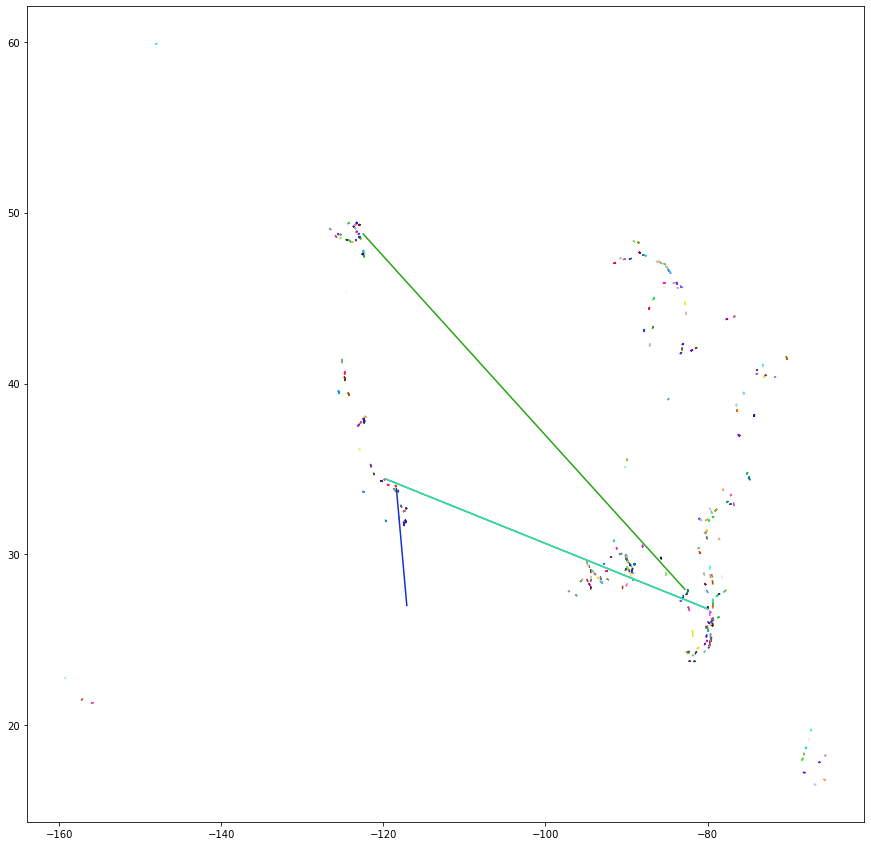

In [80]:
# Plot ship movement on a graph

import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 15))

unique_mmsi = data3['MMSI'].unique()
print(f'There are {len(unique_mmsi)} unique MMSI in the subset that travel greater than {distance_km}km')

for mmsi in unique_mmsi:
  unique_data = data3[data3['MMSI'] == mmsi]

  unique_color = (random.random(), random.random(), random.random())
  plt.plot(unique_data['LON'], unique_data['LAT'], label=mmsi, c=unique_color)

plt.show()

Looking at the latitude and longitude of the data, the area the map is graphing is around Lake Michigan and Lake Huron area (Chicago, Detroit, etc.) which you can see [here](https://www.google.com/maps/@45.3760508,-84.7174994,6.36z). The long lines shown in the graph travel through land areas, because the data doesn't include pings from when these vessels were travelling around the land. The actual distances travelled would be reasonably larger, but this gives us an idea of the start/end locations of these trips.

It will also be important to look at how often the vessels are pinged to see how much data we potentially miss during these trips.